In [9]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[1] Checking for Missing Values and get the approximately information of data:

Detecting missing values is crucial for understanding data quality. If there were missing values, specific techniques (like imputation or removal) might be necessary to handle them.

[2] Correlation Heatmap:

Understanding feature correlations is important for feature selection and multicollinearity analysis. A heatmap provides an intuitive representation of the relationships between different features.

[3] Boxplot of Feature Distributions:

Boxplots provide a concise summary of the distribution, helping identify potential outliers and understand the spread of values for each feature.

[4] Histograms of Feature Distributions:

Helping visualize the distribution of individual features. Understanding the distribution is essential for identifying potential outliers, detecting skewness, and gaining insights into the overall data structure.

In [10]:
transaction = pyreadr.read_r('/data/IDEA_DeFi_Research/Data/Lending_Protocols/Aave/V2/Mainnet/transactions.rds')
df = transaction[None]
# for test if the data is loaded
df.head()

,id,type,timestamp,user,userAlias,onBehalfOf,onBehalfOfAlias,pool,reserve,amount,...,liquidatorAlias,priceInUsd,borrowRateModeTo,borrowRateModeFrom,stableBorrowRate,variableBorrowRate,target,totalFee,version,deployment
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,borrow,1.606841e+09,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,borrow,1.606902e+09,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,borrow,1.606905e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,LINK,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,borrow,1.606913e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,AAVE,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,borrow,1.606915e+09,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet


In [11]:
# get information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951343 entries, 0 to 1951342
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   object 
 1   type                 object 
 2   timestamp            float64
 3   user                 object 
 4   userAlias            object 
 5   onBehalfOf           object 
 6   onBehalfOfAlias      object 
 7   pool                 object 
 8   reserve              object 
 9   amount               float64
 10  amountUSD            float64
 11  amountETH            float64
 12  borrowRate           float64
 13  borrowRateMode       object 
 14  fromState            object 
 15  toState              object 
 16  liquidator           object 
 17  principalAmount      float64
 18  principalReserve     object 
 19  principalAmountUSD   float64
 20  principalAmountETH   float64
 21  collateralAmount     float64
 22  collateralReserve    object 
 23  collateralAmountUSD  float64
 24

In [12]:
# checking for missing values in the data
print(df.isnull().sum())

id                           0
type                         0
timestamp                    0
user                     42317
userAlias                42317
onBehalfOf              687838
onBehalfOfAlias         687838
pool                         0
reserve                  29013
amount                  645521
amountUSD               687838
amountETH               687838
borrowRate             1700001
borrowRateMode         1700001
fromState              1338706
toState                1338706
liquidator             1922330
principalAmount        1922434
principalReserve       1922434
principalAmountUSD     1922434
principalAmountETH     1922434
collateralAmount       1922433
collateralReserve      1922433
collateralAmountUSD    1922433
collateralAmountETH    1922433
liquidatorAlias        1922330
priceInUsd             1410385
borrowRateModeTo       1947472
borrowRateModeFrom     1947472
stableBorrowRate       1947472
variableBorrowRate     1947472
target                 1909026
totalFee

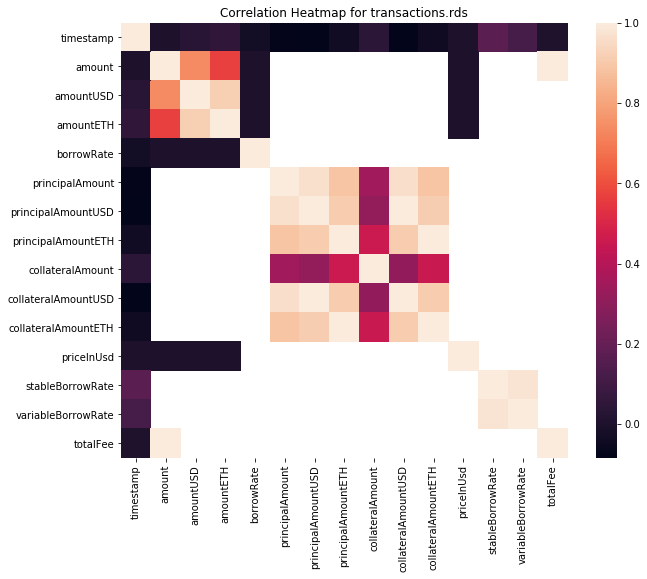

In [13]:
# draw the corelation heatmap
# DataFrame contains non-numeric data that cannot be converted to a float.
df = df.select_dtypes(include='number') # drop non-numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap for transactions.rds")
plt.show()

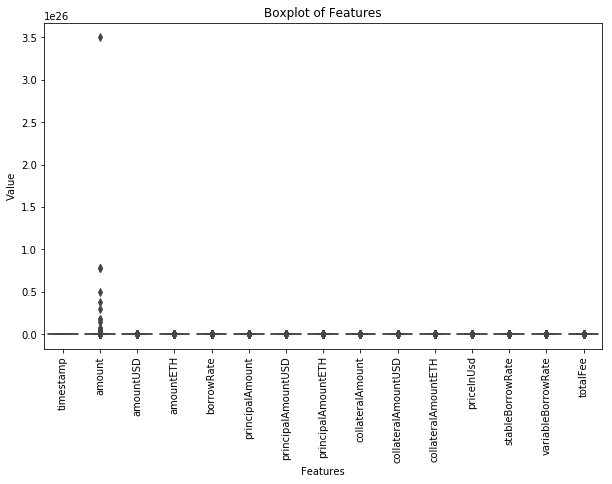

In [14]:
# draw the boxplot of data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="v")
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Boxplot of Features")
plt.show()